# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [3]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
titanic_data=titanic_data.drop(['Cabin', 'PassengerId' , 'Name', 'Ticket' ], axis=1)
titanic_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [7]:
#list(titanic_data.groupby('Survived')) 
#549 0s, 342 1s

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
titanic_data.dropna(axis = 0, inplace = True)

In [10]:
titanic_data.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

Plotting Data

Pclass


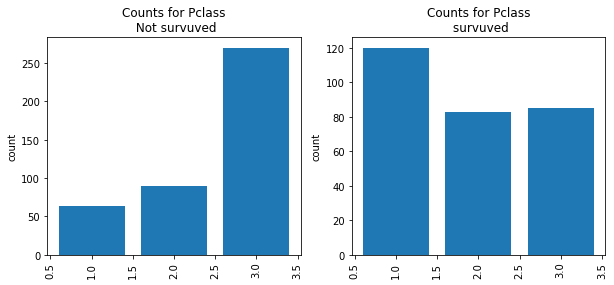

Sex


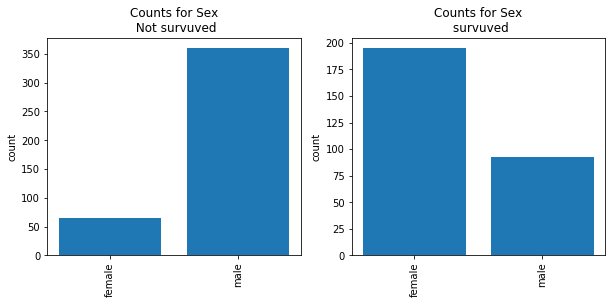

SibSp


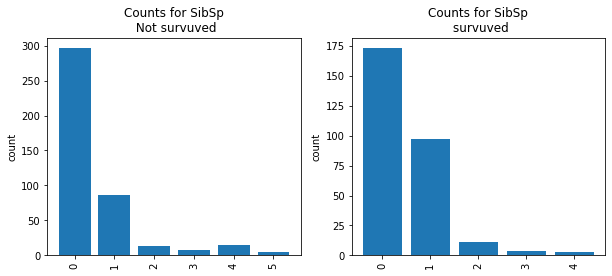

Parch


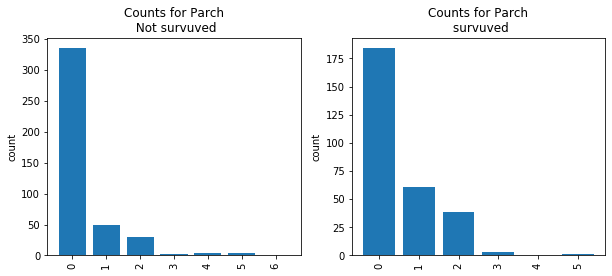

Embarked


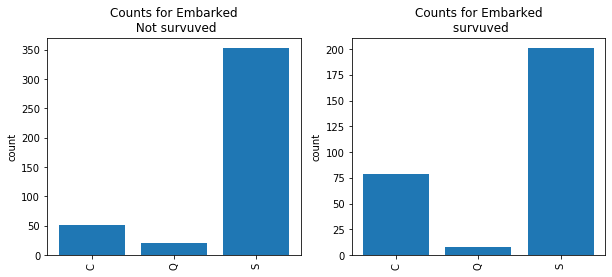

In [11]:
dummydf=titanic_data.copy()
dummydf['dummy'] = np.ones(shape = dummydf.shape[0])
cat_cols = [ 'Pclass', 'Sex',  'SibSp', 'Parch', 'Embarked']
#print('ef',dummydf['dummy'])
for col in cat_cols:
    print(col)
    counts = dummydf[['dummy', 'Survived', col]].groupby(['Survived', col], as_index = False).count()
    temp = counts[counts['Survived'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['Survived'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Not survuved')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['Survived'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n survuved')
    plt.ylabel('count')
    plt.show()

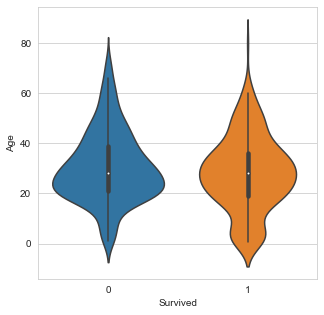

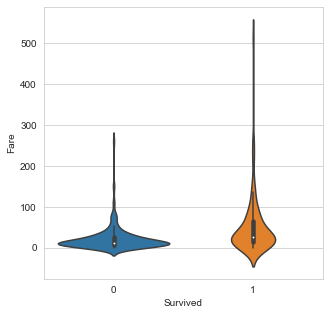

In [12]:
def plot_violin(credit, cols, col_x ):
    for col in cols:
        fig= plt.figure(figsize=(5,5))
        sns.set_style("whitegrid")
        fig=sns.violinplot(col_x,col, data=credit)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
plot_violin(titanic_data , ['Age' , 'Fare'] , 'Survived')

Categorical coluumn encoding and test train split

In [13]:
for i in ['Sex' , 'Embarked']:
    enc = preprocessing.LabelEncoder()
    enc.fit(titanic_data[i])
    titanic_data[i] = enc.transform(titanic_data[i])
print(titanic_data.head())

x= titanic_data.drop('Survived',axis=1)
y= titanic_data['Survived']

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [14]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, stratify=y, random_state=1)
X_train
#X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
884,3,1,25.0,0,0,7.0500,2
202,3,1,34.0,0,0,6.4958,2
559,3,0,36.0,1,0,17.4000,2
681,1,1,27.0,0,0,76.7292,0
105,3,1,28.0,0,0,7.8958,2
...,...,...,...,...,...,...,...
708,1,0,22.0,0,0,151.5500,2
265,2,1,36.0,0,0,10.5000,2
867,1,1,31.0,0,0,50.4958,2
570,2,1,62.0,0,0,10.5000,2


Apply CART models

In [15]:
dt = DecisionTreeClassifier(max_depth=6 , random_state=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: " , acc )

Test set accuracy:  0.7692307692307693


In [16]:
dt1 = DecisionTreeClassifier(max_depth=6 , criterion = 'entropy', random_state=3)
dt1.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: " , acc )

Test set accuracy:  0.7692307692307693


fig= plt.figure(figsize=(8,8))
fig=plot_decision_regions(x.values, y.values, clf=dt, legend=2)
plt.show()
#fig=plot_decision_regions(x.values, y.values, clf=dt1, legend=2)
#plt.show()

In [17]:
print(confusion_matrix(y_test, y_pred))
print("---- For cart -----")
print(classification_report(y_test, y_pred))

[[70 15]
 [18 40]]
---- For cart -----
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        85
           1       0.73      0.69      0.71        58

    accuracy                           0.77       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



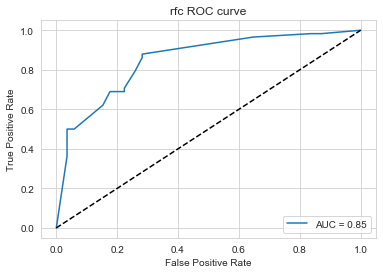

In [18]:
probs= dt.predict_proba(X_test)
probs=probs[:,1]
fper, tper, thresholds = roc_curve(y_test, probs)
auc1 = auc(fper, tper)
plt.plot(fper, tper, label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('rfc ROC curve')
# show the plot
plt.show()

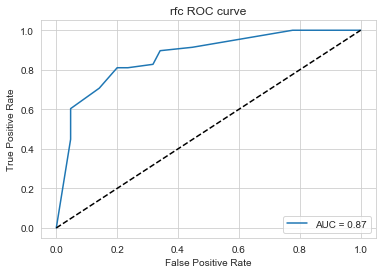

In [19]:
probs= dt1.predict_proba(X_test)
probs=probs[:,1]
fper, tper, thresholds = roc_curve(y_test, probs)
auc1 = auc(fper, tper)
plt.plot(fper, tper, label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('rfc ROC curve')
# show the plot
plt.show()

Bagging

In [20]:
bc = BaggingClassifier(base_estimator=dt, n_estimators=900, n_jobs=-1) 
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: " , acc )
print('predictions', y_pred)

Test set accuracy:  0.8041958041958042
predictions [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0]


In [145]:
print(confusion_matrix(y_test, y_pred))
print("---- For bagging -----")
print(classification_report(y_test, y_pred))

[[75 10]
 [18 40]]
---- For cart -----
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        85
           1       0.80      0.69      0.74        58

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



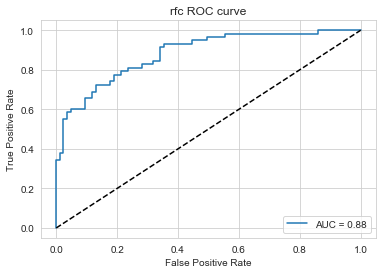

In [146]:
probs= bc.predict_proba(X_test)
probs=probs[:,1]
fper, tper, thresholds = roc_curve(y_test, probs)
auc1 = auc(fper, tper)
plt.plot(fper, tper, label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('rfc ROC curve')
# show the plot
plt.show()

Random Forrest

In [160]:
#RandomForestClassifier?
rfc= RandomForestClassifier(n_estimators=900,criterion='entropy', max_features='log2', n_jobs=-1 )
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: " , acc )

Test set accuracy:  0.7902097902097902


In [161]:
print(confusion_matrix(y_test, y_pred))
print("---- For rfc -----")
print(classification_report(y_test, y_pred))

[[69 16]
 [14 44]]
---- For rfc -----
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        85
           1       0.73      0.76      0.75        58

    accuracy                           0.79       143
   macro avg       0.78      0.79      0.78       143
weighted avg       0.79      0.79      0.79       143



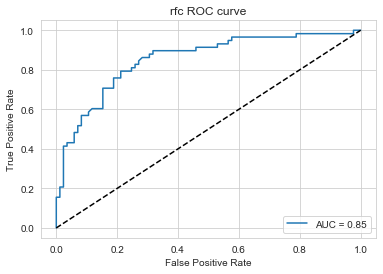

In [162]:
probs= rfc.predict_proba(X_test)
probs=probs[:,1]
fper, tper, thresholds = roc_curve(y_test, probs)
auc1 = auc(fper, tper)
plt.plot(fper, tper, label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('rfc ROC curve')
# show the plot
plt.show()

In [1]:
#use boosting , voting classifier